Matplotlib is building the font cache; this may take a moment.


Введите значение y(0): 0
Введите границы промежутка поиска решения [a; b] через пробел: 0 1
 0.1


n = 11
Сетка w: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Введите 0, если выполнять проверку не нужно, и 1, если нужно. 1



Численное решение дифференциального уравнения:
 [0.00000000e+00 3.33677234e-04 2.68814723e-03 9.24646012e-03
 2.27435689e-02 4.72148971e-02 8.93597832e-02 1.61115047e-01
 2.84777008e-01 5.03731502e-01 9.06055276e-01]

Значения невязок:
 [0.00000000e+00 1.04010210e-08 6.16654599e-08 1.49898989e-07
 2.64439981e-07 3.78271673e-07 4.11865906e-07 8.51755518e-08
 1.67788591e-06 9.09317806e-06 3.86666734e-05]
Максимальная невязка: 3.866667342677932e-05

Вывод: действительно, получен 4 порядок аппроксимации.


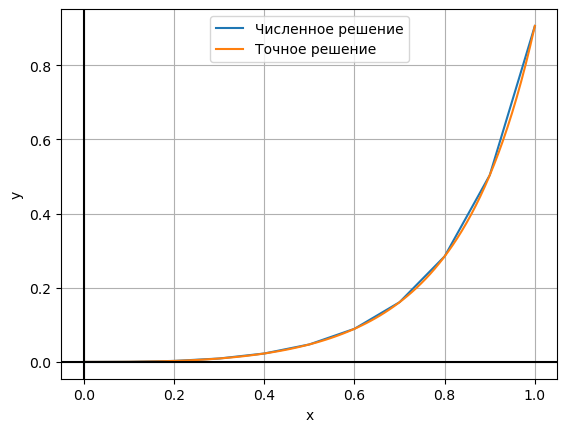

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def RungeKutta4(fname):
    # Ввод начального условия
    y0 = float(input('Введите значение y(0):'))
    
    # Ввод a, b
    a, b = map(float, input('Введите границы промежутка поиска решения [a; b] через пробел:').split())
    
    # Ввод h
    h = float(input('Введите шаг h:'))
    
    # Определим число узлов n (на самом деле n + 1)
    n = int((b - a) / h + 1)
    print('n =', n)
    
    # Зададим сетку
    w = np.zeros(n)
    k = 0
    for k in range (0, n):
        if k == 0:
            w[k] = a
        else:
            w[k] = w[k - 1] + h
            
    print('Сетка w:', w)
    
    # Зададим массив значений сеточной функции
    y_k = np.zeros(n)
    y_k[0] = y0
    
    # Массив промежуточных функций для метода Рунге-Кутты
    p = np.ones(n)
    
    # Приступим к применению метода
    k = 1
    i = 0
    for k in range (1, n):
        p[0] = fname(w[k - 1], y_k[k - 1])
        p[1] = fname(w[k - 1] + 0.5 * h, y_k[k - 1] + 0.5 * h * p[0])
        p[2] = fname(w[k - 1] + 0.5 * h, y_k[k - 1] + 0.5 * h * p[1])
        p[3] = fname(w[k - 1] + h, y_k[k - 1] + h * p[2])
        y_k[k] = y_k[k - 1] + (h / 6) * (p[0] + 2 * p[1] + 2 * p[2] + p[3])
        
    # Вернём сетку и численное решение ДУ
    return w, y_k

# Ввод f(x, y) будем осуществлять вручную в виде определения f-функции:
def func(x, y):
    return 3 * (x ** 2) * y + (x ** 2) * (np.exp(x ** 3))

data = RungeKutta4(func)

check = 2
while (check != 0 and check != 1):
    check = int(input('Введите 0, если выполнять проверку не нужно, и 1, если нужно.'))
    
#
print('\nЧисленное решение дифференциального уравнения:\n', data[1])

if check == 0:
    # Построим график численного решения
    plt.plot(data[0], data[1])
    plt.axhline(y = 0, color = 'k')
    plt.xlabel('x')
    plt.axvline(x = 0, color = 'k')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    
elif check == 1:
    # Вычислим значения невязок
    diff = abs(data[1] - (data[0] ** 3) * np.exp(data[0] ** 3) / 3)
    print('\nЗначения невязок:\n', diff)
    print('Максимальная невязка:', max(diff))
    if max(diff) < 0.0001:
        print('\nВывод: действительно, получен 4 порядок аппроксимации.')
    else:
        print('\nОшибка! Погрешность вычислений имеет порядок, меньший 4.')
        
    # Построим графики численного и точного решений
    x = np.linspace(0, 1, 100)
    plt.plot(data[0], data[1], label = 'Численное решение')
    plt.plot(x, (x ** 3) * np.exp(x ** 3) / 3, label = 'Точное решение')
    plt.axhline(y = 0, color = 'k')
    plt.xlabel('x')
    plt.axvline(x = 0, color = 'k')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()